# **Dataset: Mall Customer Dataset**

# **Exercise 1: Implementing K-Means Clustering on Customer Segments**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(list(uploaded.keys())[0])
print(data.head())
print(data.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
feature = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature)

In [4]:
# Apply K-Means clustering
kmean = KMeans(n_clusters=5, random_state=42)
kmean.fit(feature_scaled)
data['cluster'] = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


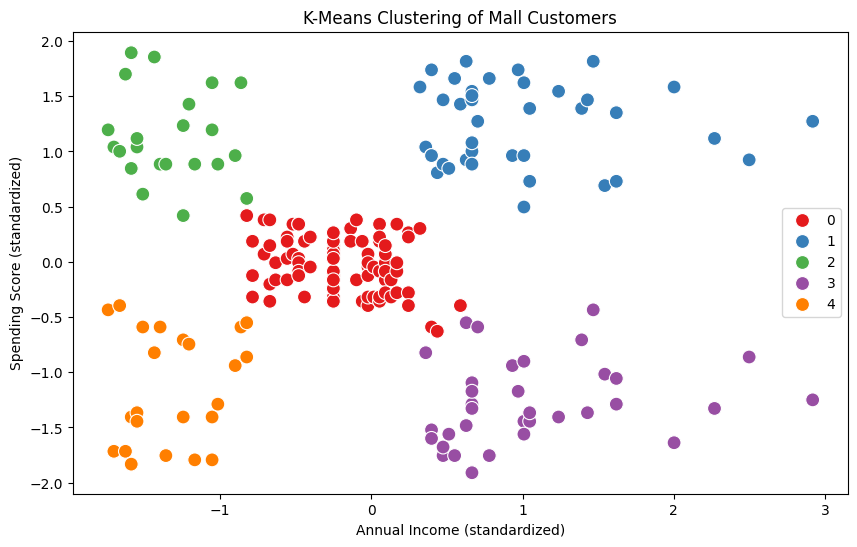

In [6]:
# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_scaled[:, 0], y=feature_scaled[:, 1], hue=data['cluster'], palette='Set1', s=100)
plt.xlabel('Annual Income (standardized)')
plt.ylabel('Spending Score (standardized)')
plt.title('K-Means Clustering of Mall Customers')
plt.legend()
plt.show()

# **Exercise 2: Optimal Number of Clusters: Elbow Method and Silhouette Score**

In [25]:
from sklearn.metrics import silhouette_score

# Optimal number of clusters using elbow method
elbow = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
  kmeans.fit(feature_scaled)
  elbow.append(kmeans.inertia_)

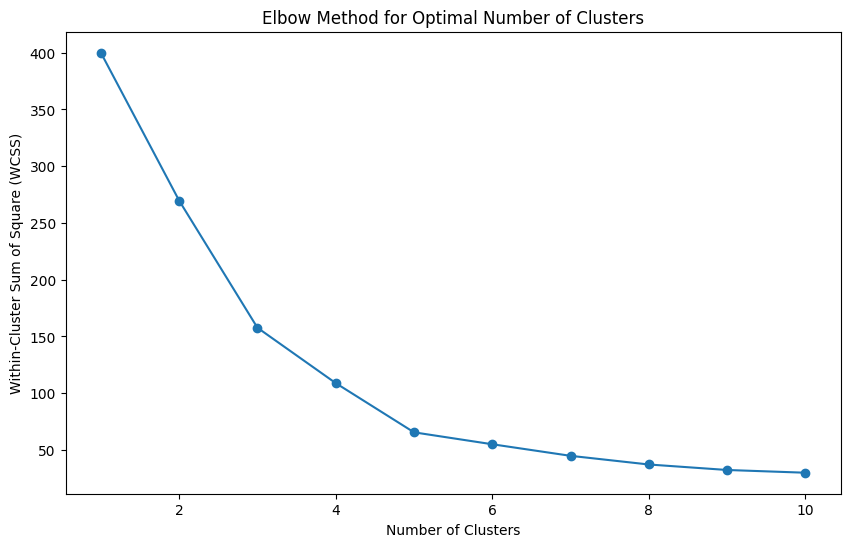

In [26]:
# Plot elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), elbow, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.show()

In [27]:
# Optimal number of clusters using silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(feature_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(feature_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

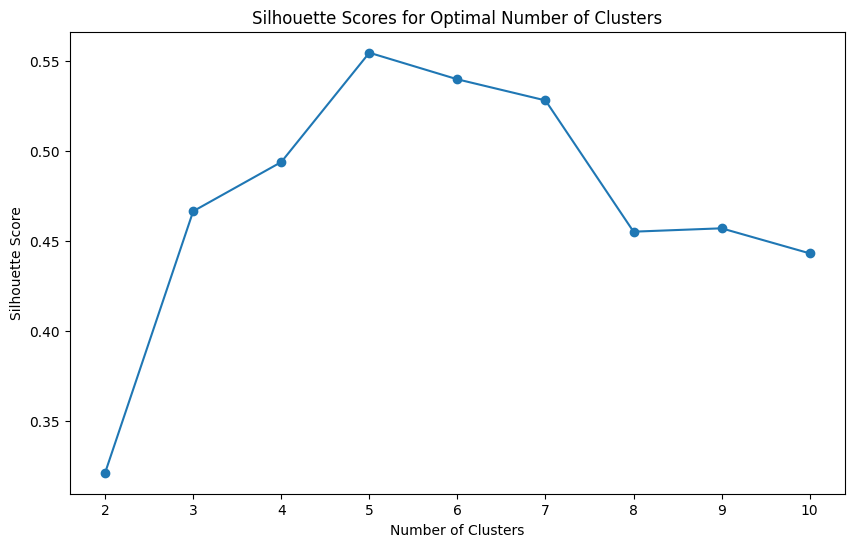

In [28]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# **Exercise 3: Cluster Profiling and Insights**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [31]:
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(feature_scaled)
data['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
# Analyzing characteristics of each cluster
cluster_profile = data.groupby('cluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max', 'count'], 'Spending Score (1-100)': ['mean', 'min', 'max']
}).reset_index()

cluster_profile.columns = ['Cluster', 'Income Mean', 'Income Min', 'Income Max', 'Count', 'Spending Score Mean', 'Spending Score Min', 'Spending Score Max']

In [34]:
print(cluster_profile)

   Cluster  Income Mean  Income Min  Income Max  Count  Spending Score Mean  \
0        0    55.296296          39          76     81            49.518519   
1        1    86.538462          69         137     39            82.128205   
2        2    25.727273          15          39     22            79.363636   
3        3    88.200000          70         137     35            17.114286   
4        4    26.304348          15          39     23            20.913043   

   Spending Score Min  Spending Score Max  
0                  34                  61  
1                  63                  97  
2                  61                  99  
3                   1                  39  
4                   3                  40  


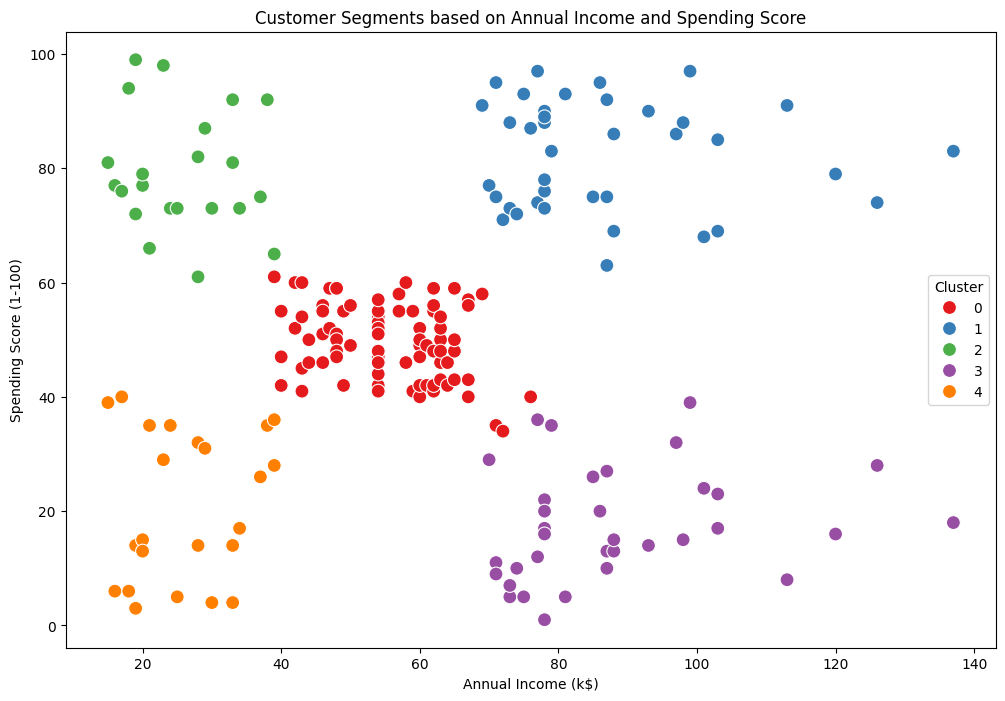

In [35]:
# Visualize Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='Set1', s=100, data=data)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# **Exercise 4: Hierarchical Clustering for Customer Segmentation**

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

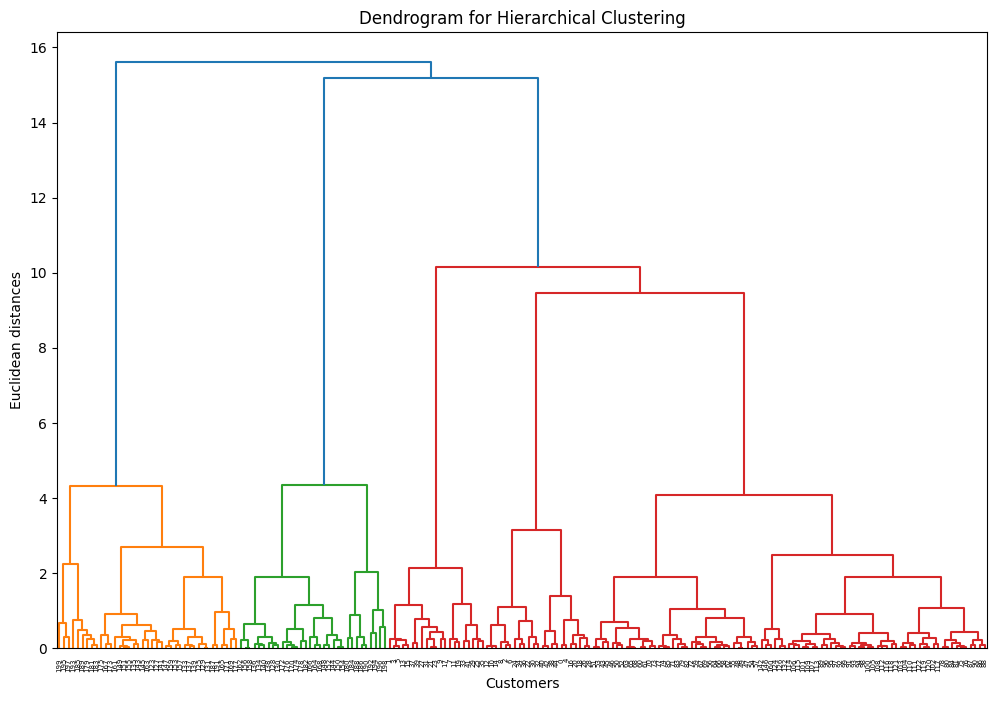

In [38]:
# Perform hierarchical clustering
Z = linkage(feature_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [39]:
# Form clusters
max_d = 5  # You can adjust this value based on the dendrogram
clusters_hierarchical = fcluster(Z, max_d, criterion='maxclust')

data['cluster_hierarchical'] = clusters_hierarchical

In [40]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(feature_scaled)
data['cluster_kmeans'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


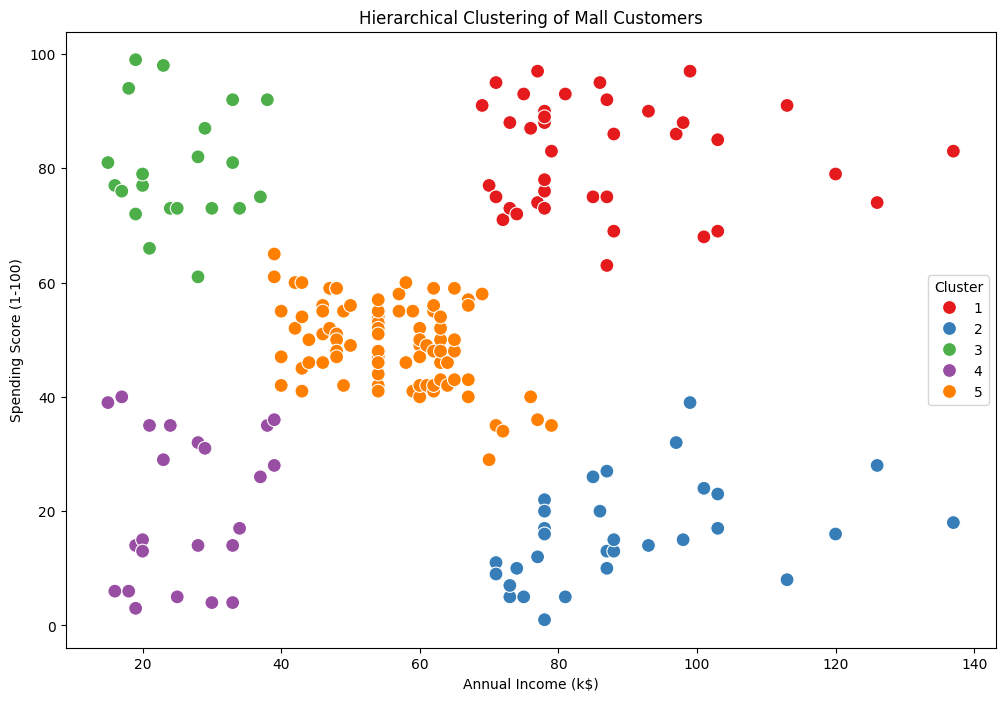

In [41]:
# Visualizing hierarchical clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_hierarchical', palette='Set1', s=100, data=data)
plt.title('Hierarchical Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

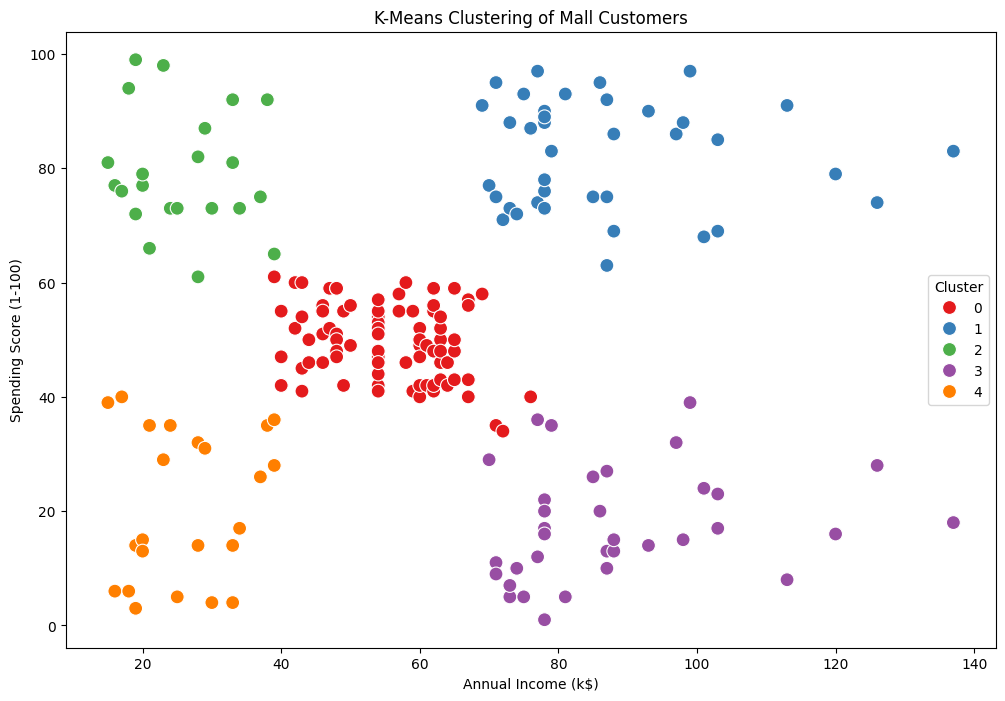

In [42]:
# Visualizing K-Means clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_kmeans', palette='Set1', s=100, data=data)
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# **Exercise 5: Visualizing Clusters with PCA**

In [43]:
from sklearn.decomposition import PCA

In [44]:
# Perform Hierarchical and K-Means Clustering
Z = linkage(feature_scaled, method='ward')
clusters_hierarchical = fcluster(Z, 5, criterion='maxclust')

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(feature_scaled)
clusters_kmeans = kmeans.labels_

data['cluster_hierarchical'] = clusters_hierarchical
data['cluster_kmeans'] = clusters_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
# Apply PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(feature_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=features_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster_hierarchical'] = clusters_hierarchical
pca_df['cluster_kmeans'] = clusters_kmeans

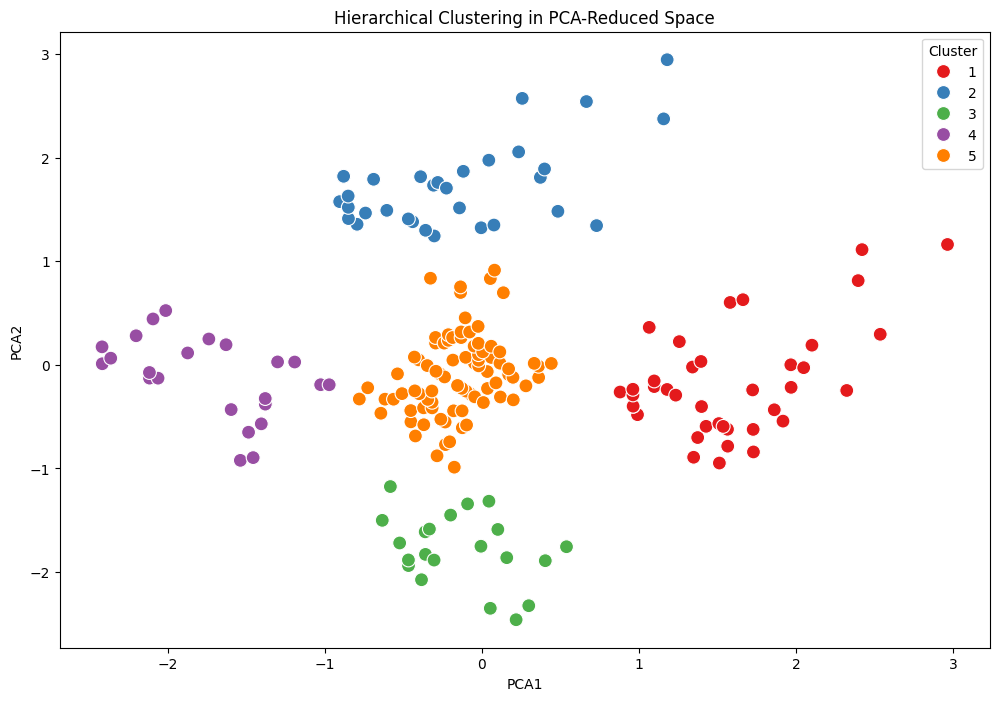

In [46]:
# Hierarchical clusters in PCA-reduced space
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster_hierarchical', palette='Set1', s=100, data=pca_df)
plt.title('Hierarchical Clustering in PCA-Reduced Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

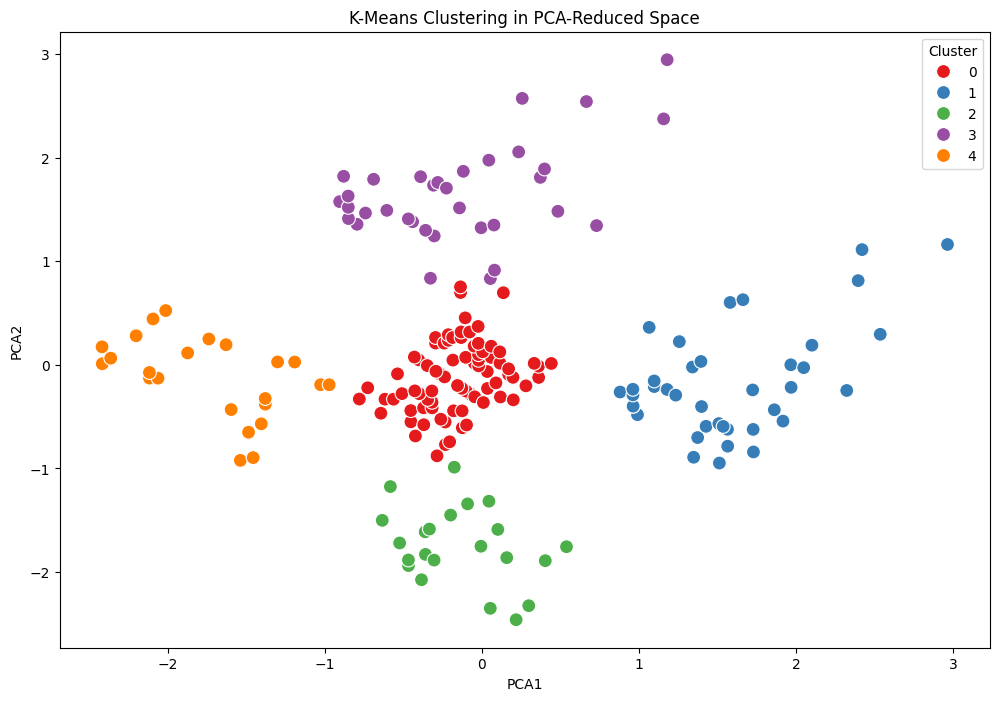

In [47]:
# K-Means clusters in PCA-reduced space
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster_kmeans', palette='Set1', s=100, data=pca_df)
plt.title('K-Means Clustering in PCA-Reduced Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()